In [0]:
import numpy as np
import imutils
import cv2
import matplotlib.pyplot as plt 

In [0]:
CLASSES = open('enet-classes.txt').read().strip().split("\n")

COLORS = open('enet-colors.txt').read().strip().split("\n")
COLORS = [c.split(",") for c in COLORS]
COLORS = np.array(COLORS, dtype="uint8")

	# np.random.seed(42)
# COLORS = np.random.randint(0, 255, size=(len(CLASSES) - 1, 3),dtype="uint8")
# COLORS = np.vstack([[0, 0, 0], COLORS]).astype("uint8")

In [27]:
COLORS[2][0]

244

In [0]:
# img=np.zeros((200,200,3), dtype="uint8")
# for i,_ in enumerate(CLASSES):
#   cv2.putText(img,CLASSES[i],(10,5),cv2.FONT_HERSHEY_PLAIN,0.3,(255,0,0))
#   cv2.rectangle(img,(0,0),(20,20),(COLORS[i][0],COLORS[i][1],COLORS[i][2]),2,-1)

In [0]:
img = np.zeros(((len(CLASSES) * 25) + 25, 300, 3), dtype="uint8")

for (i, (className, color)) in enumerate(zip(CLASSES, COLORS)):

	color = [int(c) for c in color]
	cv2.putText(img, className, (5, (i * 25) + 17),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
	cv2.rectangle(img, (100, (i * 25)), (300, (i * 25) + 25),tuple(color), -1)

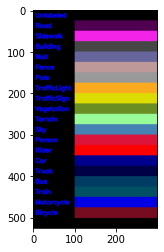

In [35]:
plt.imshow(img)

In [117]:
print("loading model...")
net = cv2.dnn.readNet('enet-model.net')

image = cv2.imread('/content/example_02.jpg')
image = imutils.resize(image, width=512)
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (1024, 512), 0,swapRB=True, crop=False)

net.setInput(blob)
output = net.forward()

loading model...


In [123]:
output[0][0]
#probability for each pixel for corresponding to class label 0

array([[17.31379 , 16.329947, 15.919561, ..., 14.56813 , 18.407131,
        17.545465],
       [14.95403 , 13.909224, 14.539624, ..., 13.22944 , 15.635828,
        14.714158],
       [14.490918, 13.875664, 13.265039, ..., 10.554265, 16.00276 ,
        15.236728],
       ...,
       [11.729653, 11.174563,  8.757591, ...,  8.044872, 12.386469,
        11.956961],
       [15.537311, 15.057065, 14.561735, ..., 12.781753, 16.66788 ,
        16.174389],
       [14.370537, 13.869221, 13.657462, ..., 12.079103, 15.508263,
        14.98503 ]], dtype=float32)

<div>
Here,<br> 
we have 20 classes.
<br>
Image shape is 512,1024 means 512*1024 pixels.
<br>
we have array named output and its shape is 1,20,512,1024...so we have  probabilities for each pixel to correspond to a perticular class.
<br>
Below image is an explanation about the output array
</div>

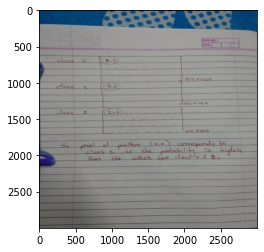

In [127]:
example_img=cv2.imread('example.jpg')
plt.imshow(example_img)

In [115]:
(numClasses, height, width) = output.shape[1:4]
classMap = np.argmax(output[0], axis=0)
print(classMap.shape)
mask = COLORS[classMap]
print(mask.shape)

(512, 1024)
(512, 1024, 3)


In [0]:
mask = cv2.resize(mask, (image.shape[1], image.shape[0]),interpolation=cv2.INTER_NEAREST)
classMap = cv2.resize(classMap, (image.shape[1], image.shape[0]),interpolation=cv2.INTER_NEAREST)
output = ((0.4 * image) + (0.6 * mask)).astype("uint8")


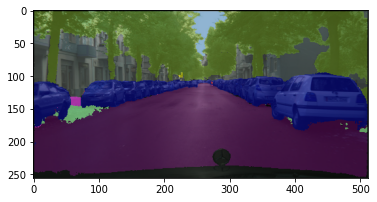

In [107]:
plt.imshow(output)

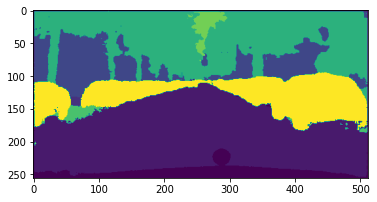

In [108]:
classMap = cv2.resize(classMap, (image.shape[1], image.shape[0]),interpolation=cv2.INTER_NEAREST)
plt.imshow(classMap)

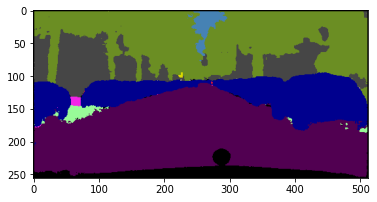

In [109]:
plt.imshow(mask)